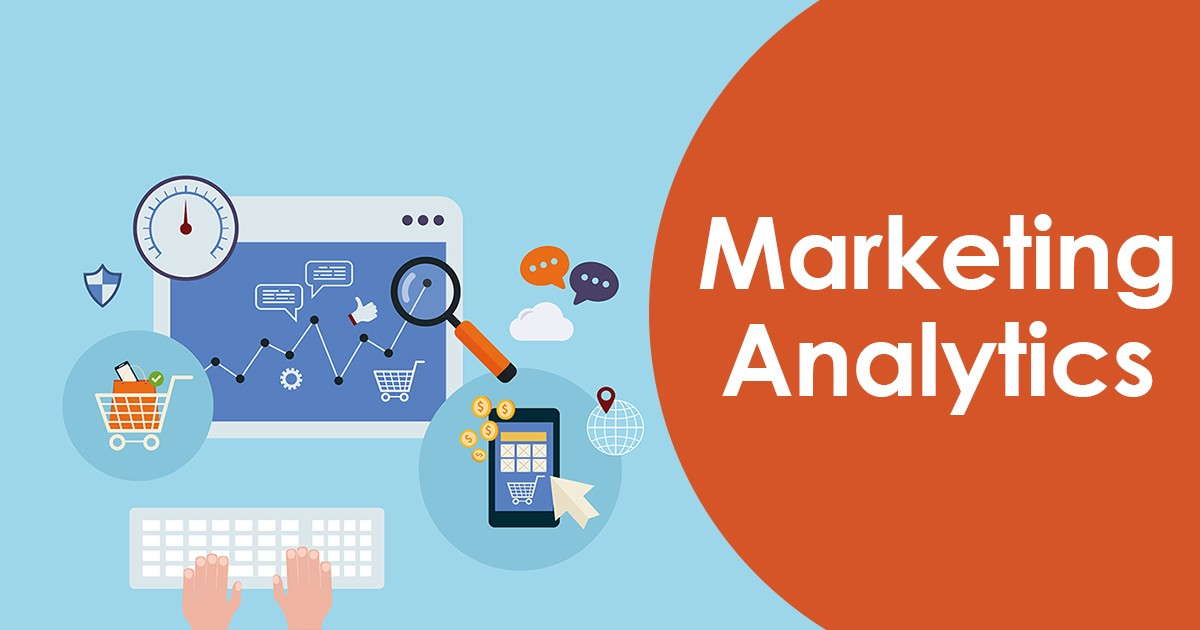


Submitted to: Prof.(Dr) Siby Abraham

Submitted by: Team 8

Team members:
    
          Akshay Shah(B006)

          Arun Raj Anandarajan(B013)

          Meet Sisodia(B027)

          Palak Agarwal(B031)

          Riya Maheshwari(B036)
          
#### Problem statment:

To find best suitable dimensionality reduction technique to reduce the no of dimensions in the dataset to 2, to compare the different clustering technique and find the business insights based on the dataset.


#### Info about the dataset:

Customer Personality Analysis is a detailed marketing analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviours and concerns of different types of customer.

The dataset contains 2240 rows and 29 cols. The 29 cols signifies the people, place, promotion and product.

#### Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE, LocallyLinearEmbedding
from matplotlib.colors import ListedColormap
from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [ ]:
c_persona = pd.read_csv("marketing_campaign.csv", delimiter="\t")
print("Number of datapoints:", len(c_persona))
c_persona.head()

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### To remove the null values

In [ ]:
c_persona = c_persona.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(c_persona))

The total number of data-points after removing the rows with missing values are: 2216


In [ ]:
c_persona["Dt_Customer"] = pd.to_datetime(c_persona["Dt_Customer"])
dates = []
for i in c_persona["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


<ipython-input-4-333098498c60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_persona["Dt_Customer"] = pd.to_datetime(c_persona["Dt_Customer"])


#### Created a feature "Customer_For"

In [ ]:
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
c_persona["Customer_For"] = days
c_persona["Customer_For"] = pd.to_numeric(c_persona["Customer_For"], errors="coerce")

<ipython-input-5-06f4439dddec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_persona["Customer_For"] = days
<ipython-input-5-06f4439dddec>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_persona["Customer_For"] = pd.to_numeric(c_persona["Customer_For"], errors="coerce")


#### Feature Engineering

In [ ]:
#Age of customer today 
c_persona["Age"] = 2023-c_persona["Year_Birth"]

#Total spendings on various items
c_persona["Spent"] = c_persona["MntWines"]+ c_persona["MntFruits"]+ c_persona["MntMeatProducts"]+ c_persona["MntFishProducts"]+ c_persona["MntSweetProducts"]+ c_persona["MntGoldProds"]

#Deriving living situation by marital status"Alone"
c_persona["Living_With"]=c_persona["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
c_persona["Children"]=c_persona["Kidhome"]+c_persona["Teenhome"]

#Feature for total members in the householde
c_persona["Family_Size"] = c_persona["Living_With"].replace({"Alone": 1, "Partner":2})+ c_persona["Children"]

#Feature pertaining parenthood
c_persona["Is_Parent"] = np.where(c_persona.Children> 0, 1, 0)

#Segmenting education levels in three groups
c_persona["Education"]=c_persona["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
c_persona=c_persona.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
c_persona = c_persona.drop(to_drop, axis=1)

#### Dropping the outliers by setting a cap on Age and income. 

In [ ]:

c_persona = c_persona[(c_persona["Age"]<90)]
c_persona = c_persona[(c_persona["Income"]<600000)]
print("The total number of c_persona-points after removing the outliers are:", len(c_persona))

The total number of c_persona-points after removing the outliers are: 2212


#### Get list of categorical variables

In [ ]:
s = (c_persona.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


#### Label Encoding the object dtypes.

In [ ]:
LE=LabelEncoder()
for i in object_cols:
    c_persona[i]=c_persona[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


#### Standard scaling of data

In [ ]:
#Creating a copy of data
ds = c_persona.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [ ]:
scaled_ds.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Customer_For', 'Age', 'Spent', 'Living_With',
       'Children', 'Family_Size', 'Is_Parent'],
      dtype='object')

## Creating the target column for supervised algorithms

In [ ]:
conditions = [
    (c_persona["AcceptedCmp1"]==1) & (c_persona["Response"]==1),
    (c_persona["AcceptedCmp1"]==0) & (c_persona["Response"]==0),
    (((c_persona["AcceptedCmp1"]==1) & (c_persona["Response"]==0)) |((c_persona["AcceptedCmp1"]==0) & (c_persona["Response"]==1)))
    ]

# create a list of the values we want to assign for each condition
values = ['Accepted both', 'Accepted None', 'Accepted once']

# create a new column and use np.select to assign values to it using our lists as arguments
c_persona['target'] = np.select(conditions, values)

values_int = [0, 1, 2]

c_persona['target_int'] = np.select(conditions, values_int)

y = c_persona['target_int']

In [ ]:
y.unique()

array([2, 1, 0])

## Dimesionality reduction

### Principal Component Analysis

In [ ]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(scaled_ds)

In [ ]:
pca.explained_variance_ratio_

array([0.36005684, 0.12660793])

#### Visualising the newly formed features with the target variable 

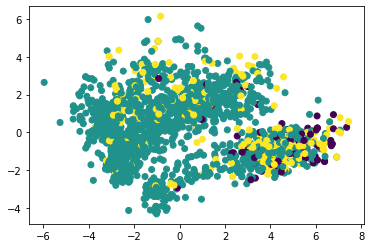

In [ ]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y);

### Inference

The total explained variance ratio of the two components is less than 50 % ideally it should be more than 95% to be eligble as a good dimensionality reduction technique. So if we are choosing PCA we need to increase the components to get a better representation of the original dataset. There is a formation of two clusters so cluster analysis also can be done on this data


### Linear Discriminant Analysis

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [ ]:
x_lda = lda.fit_transform(scaled_ds, y)
x_lda

array([[-3.10628099,  1.69845899],
       [ 0.41852465, -0.19422419],
       [-0.34151377, -0.17824672],
       ...,
       [-0.2673357 , -1.91053952],
       [ 0.41708351, -0.41533195],
       [ 0.28859312,  0.8685124 ]])

#### Visualising the newly formed features with the target variable 

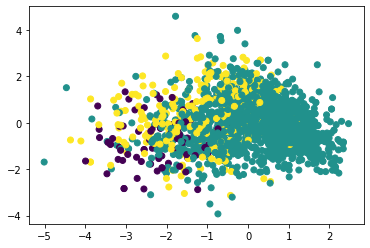

In [ ]:
plt.scatter(x_lda[:,0], x_lda[:,1], c=y);

### Inference

LDA is not separating the the dataset very well. If our goal is to get the dimension which shows maximum variability between the classes it may not be a good option as there there are many overlaps happening.


## Locally Linear Embedding

In [ ]:
lle_3=LocallyLinearEmbedding(n_neighbors=3,n_components=2)
lle_5=LocallyLinearEmbedding(n_neighbors=5,n_components=2)
lle_10=LocallyLinearEmbedding(n_neighbors=10,n_components=2)

In [ ]:
ds_lle_3=lle_3.fit_transform(scaled_ds)
ds_lle_5=lle_5.fit_transform(scaled_ds)
ds_lle_10=lle_10.fit_transform(scaled_ds)

#### Visualising the newly formed features with the target variable 

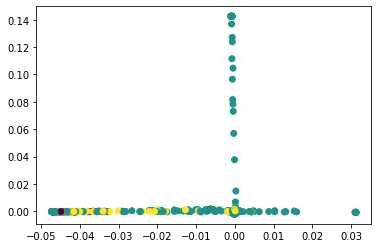

In [ ]:
plt.scatter(ds_lle_3[:,0], ds_lle_3[:,1], c=y);

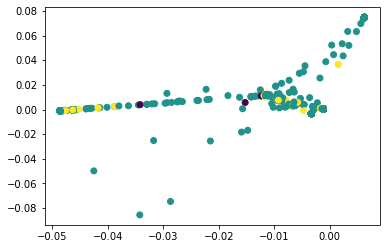

In [ ]:
plt.scatter(ds_lle_5[:,0], ds_lle_5[:,1], c=y);

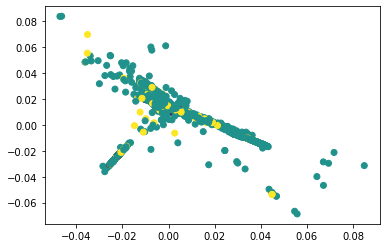

In [ ]:
plt.scatter(ds_lle_10[:,0], ds_lle_10[:,1], c=y);

### Inference

LLE spread is less compared to the PCA and LDA. If we increase the n neighbours the points are converging less compared to the lower n neighbour-based reduced dimension. LLE doesn't seem to be suitable for this dataset as shape formation is prevalent.

So it's better to go with a higher value of n neighbours for this dataset if we are choosing LLE.

## TSNE

In [ ]:
tsne=TSNE(n_components=2,random_state=100)
X_tsne=tsne.fit_transform(scaled_ds)
X_tsne

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[ -2.592303  , -34.415497  ],
       [-16.283634  ,  54.73168   ],
       [  0.34896877, -44.19491   ],
       ...,
       [  2.6416137 , -71.09848   ],
       [-32.190525  ,  -0.14278734],
       [ 12.255196  ,  44.956554  ]], dtype=float32)

#### Visualising the newly formed features with the target variable 

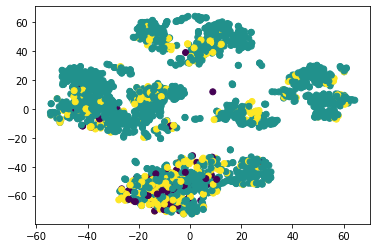

In [ ]:
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y.astype(float));

### Inference

TSNE is performed poor with respect to the class classfication but formed separable clusters which can be used for customer segmentation. So if we are going use the dataset for customer segmentation(Clsuter analysis), TSNE will be the ideal methods

### Comparing the dimensionality reduction techniques with respect to the classification ability 

In [ ]:
steps = [('PCA', PCA(n_components=2)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, scaled_ds, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy of PCA: %.3f' % np.mean(n_scores))

Accuracy of PCA: 0.821


In [ ]:
steps = [('lda', LinearDiscriminantAnalysis(n_components=2)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, scaled_ds, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy of LDA: %.3f' % np.mean(n_scores))

Accuracy of LDA: 0.827


In [ ]:
steps = [('lle', LocallyLinearEmbedding(n_neighbors=10,n_components=2)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, scaled_ds, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy of LLE: %.3f' % np.mean(n_scores))

Accuracy of LLE: 0.821


### Insights

As LDA gives more importance to the class separation of the target variable the accuracy of the LDA is a little high compared to PCA  and LLE

# Customer Segmentation using clustering

Customer segmentation is the practice of separating customers into groups that reflect similarities among customers in each cluster. We will divide customers into segments to optimize the significance of each customer to the business. To modify products according to distinct needs and behaviours of the customers. It also helps the business to cater to the concerns of different types of customers.

## K means clustering

#### Finding Ideal cluster using the Elbow method

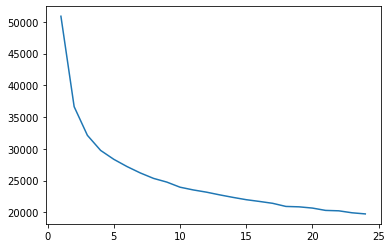

In [ ]:
SSD=[]
for k in range(1,25):
    kmeans=KMeans(n_clusters=k,random_state=10)
    kmeans.fit(scaled_ds)
    SSD.append(kmeans.inertia_)
plt.plot(range(1,25),SSD);

##### Inference
From the graph, the best value of k= 4

#### Finding Ideal cluster using the Silhouette method

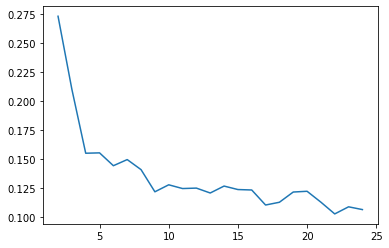

In [ ]:
SS=[]
for k in range(2,25):
    kmeans=KMeans(n_clusters=k, random_state=10)
    kmeans.fit(scaled_ds)
    SS.append(silhouette_score(scaled_ds,kmeans.predict(scaled_ds)))
plt.plot(range(2,25),SS);

#### Inference
The highest peak is at 4

As elbow method also also suggests the cluser range from 3 to 5. We will go with the highest peak value that is 4

### Building the model with optimum cluster

In [ ]:
k_best=KMeans(n_clusters=4,random_state=10)
k_best.fit(scaled_ds)
clust_pred=k_best.predict(scaled_ds)
clust_pred

array([2, 1, 2, ..., 2, 0, 1], dtype=int32)

In [ ]:
k_best.cluster_centers_

array([[-0.0840458 ,  0.4637449 , -0.50213828,  0.83534441, -0.02476151,
         0.64348648,  0.18355317,  0.02259796,  0.13396315,  0.20063902,
         0.48906587,  0.58271725,  0.91834217,  0.34485227,  0.76331373,
         0.03495503,  0.23718368,  0.29760261,  0.44861346,  0.0501017 ,
         0.24686003,  0.23060678,  0.61340567],
       [ 0.01133437, -0.43086358,  0.65179465,  0.96080633,  0.01809411,
        -0.67109289, -0.56508899, -0.62139249, -0.58612778, -0.56597346,
        -0.54708076,  0.22283622, -0.5782414 , -0.65038539, -0.66229385,
         0.29874062, -0.24933545,  0.38110981, -0.78310583,  0.09340409,
         1.16470441,  1.01253416,  0.63245553],
       [-0.07316532,  1.12014611, -0.80445517, -0.89359265,  0.02132605,
         0.88974677,  0.95056164,  1.34235166,  1.03146926,  0.92547854,
         0.5713827 , -0.61899856,  0.31325127,  1.12756689,  0.74741348,
        -1.09661556, -0.02413688,  0.06399062,  1.26637611, -0.12976653,
        -1.2252683 , -1.0818

In [ ]:
silhouette_score(scaled_ds, clust_pred)

0.15497424349077119

#### Visulaising the first two cols with the cluster

<Figure size 720x576 with 0 Axes>

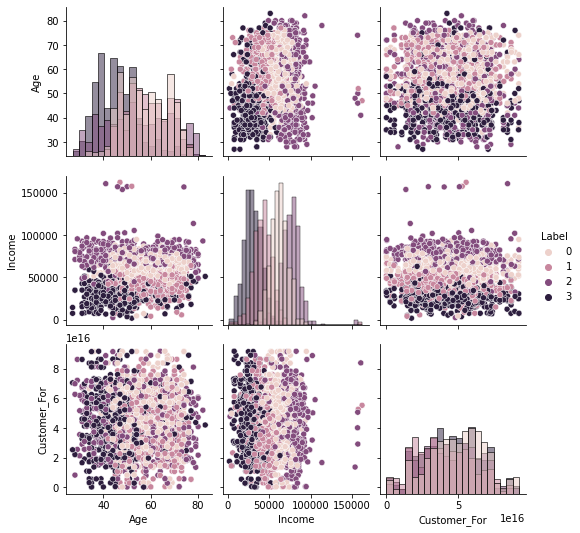

<Figure size 720x576 with 0 Axes>

In [ ]:
c_persona['Label']=clust_pred
sns.pairplot(c_persona[["Age","Income","Customer_For","Label"]],hue='Label', diag_kind='hist', kind='scatter');
plt.figure(figsize=(10,8))

## Hierarichal Clustering

### Agglomerative Clustering

In [ ]:
import scipy.cluster.hierarchy as sch 

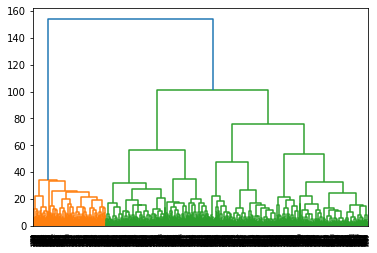

In [ ]:
dendro=sch.dendrogram(sch.linkage(scaled_ds, method='ward'))

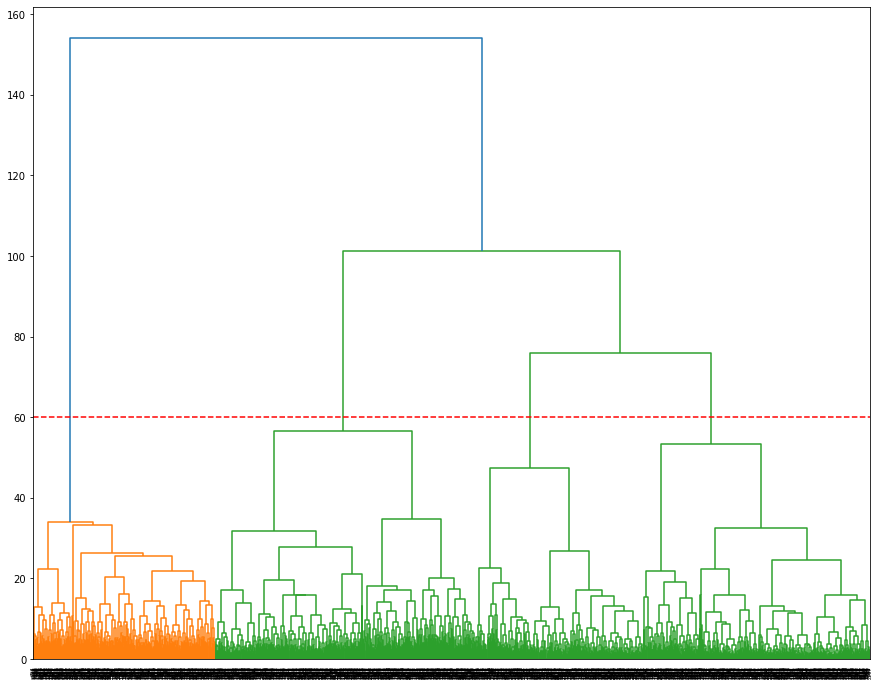

In [ ]:
plt.figure(figsize=(15,12))
dendro=sch.dendrogram(sch.linkage(scaled_ds,method='ward'))
plt.axhline(y=60,color='red',linestyle='--')

In [ ]:

cluster= AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(scaled_ds)
c1=cluster.fit_predict(scaled_ds)

In [ ]:
silhouette_score(scaled_ds,c1)

0.15386755909931005

#### Silhouette score is 0.15, that means agglomerative clustering is not doing well 

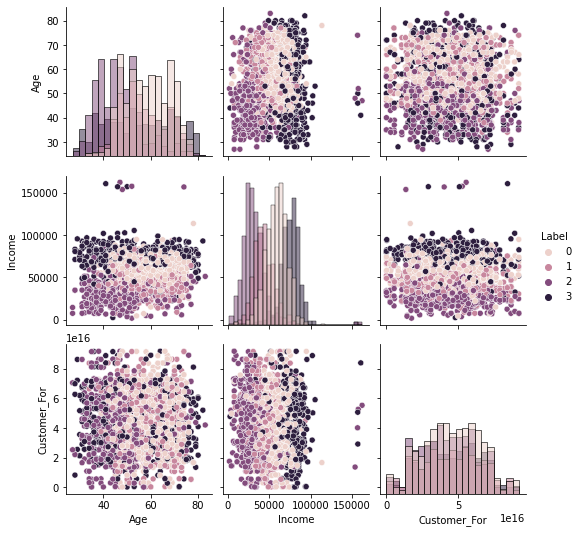

In [ ]:
c_persona['Label']=c1
sns.pairplot(c_persona[["Age","Income","Customer_For","Label"]],hue='Label', diag_kind='hist', kind='scatter');

## Clustering using Gaussian Mixture Models

In [ ]:
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=4,n_init=10)

In [ ]:
# training
gmm.fit(scaled_ds)

GaussianMixture(n_components=4, n_init=10)

In [ ]:
# prediction
pred=gmm.predict(scaled_ds)
pred

array([3, 2, 3, ..., 3, 0, 2])

In [ ]:
gmm.means_

array([[-9.88015950e-02,  3.44584716e-01, -2.71284930e-01,
         7.37642505e-01,  3.57010265e-03,  4.56478668e-01,
         1.20478330e-01, -3.33660678e-02,  8.81707209e-02,
         1.24148746e-01,  3.77383006e-01,  6.60418051e-01,
         7.82233288e-01,  2.42492952e-01,  5.82864370e-01,
         1.03864488e-01,  2.11075061e-01,  2.04356299e-01,
         2.99961070e-01,  4.83950911e-02,  3.41305000e-01,
         3.07812648e-01,  6.32455532e-01],
       [-1.60964749e-01,  2.90510447e+00, -5.12291101e-01,
        -6.23399370e-01, -4.72969053e-01, -4.83684093e-01,
        -4.52905555e-01,  4.86523203e+00,  1.40333238e-01,
         5.42498681e-01, -7.40090461e-01,  2.77644147e+00,
         5.75769709e-01,  5.29383687e+00, -1.37627556e+00,
        -1.78199666e+00,  4.05833272e-01, -5.20247154e-01,
         1.49640233e+00,  4.41046770e-02, -8.19736183e-01,
        -6.54644326e-01, -8.43274043e-01],
       [ 7.22398409e-02, -7.62837397e-01,  8.34577251e-01,
         6.51434774e-02, -2.1

In [ ]:
np.bincount(pred)

array([722,   6, 856, 628])

In [ ]:
gmm.weights_

array([0.32589757, 0.00271248, 0.38748398, 0.28390597])

In [ ]:
gmm.covariances_

array([[[ 8.49297707e-01, -2.06789638e-02, -7.60600262e-03, ...,
         -8.30007907e-04,  1.15424438e-02, -6.12804879e-32],
        [-2.06789638e-02,  3.60392246e-01, -1.33751578e-01, ...,
         -1.31585840e-02,  2.09188981e-03,  1.24749565e-31],
        [-7.60600262e-03, -1.33751578e-01,  7.90509715e-01, ...,
          2.97138666e-01,  2.67959469e-01, -3.15430369e-31],
        ...,
        [-8.30007907e-04, -1.31585840e-02,  2.97138666e-01, ...,
          3.47771780e-01,  3.01735888e-01, -2.40744774e-31],
        [ 1.15424438e-02,  2.09188981e-03,  2.67959469e-01, ...,
          3.01735888e-01,  5.31091284e-01,  3.67956501e-31],
        [-1.22560976e-31,  1.29126742e-31, -3.53457100e-31, ...,
         -2.34179008e-31,  3.67956501e-31,  1.00000000e-06]],

       [[ 5.36735188e-01,  1.00223772e+00, -2.27451445e-01, ...,
          9.25185854e-18,  0.00000000e+00,  0.00000000e+00],
        [ 1.00223772e+00,  6.73049802e+00, -1.61613748e+00, ...,
         -7.15970738e-01, -4.23701207e

## Finding no of clusters

In [ ]:
n_components=np.arange(1,11)
aic_scores=[]
bic_scores=[]
for n in n_components:
    model=GaussianMixture(n,n_init=10)
    model.fit(scaled_ds)
    aic_score=model.aic(scaled_ds)
    bic_score=model.bic(scaled_ds)
    aic_scores.append(aic_score)
    bic_scores.append(bic_score)

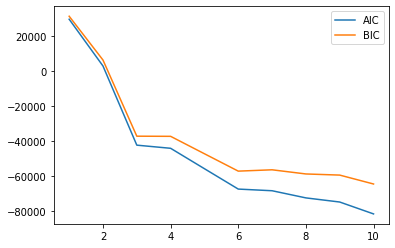

In [ ]:
plt.plot(n_components,aic_scores,label='AIC')
plt.plot(n_components,bic_scores,label='BIC')
plt.legend();

In [ ]:
silhouette_score(scaled_ds, pred)

0.17658502276985183

No. of clusters = 4

In [ ]:
c_persona['Label']=pred

In [ ]:
c_persona['Label'].value_counts()

2    856
0    722
3    628
1      6
Name: Label, dtype: int64

## Visualise the clusters

In [ ]:
sns.pairplot(c_persona[['Education', 'Income','Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Customer_For', 'Age', 'Spent', 'Living_With',
        'Family_Size', "Label"]],hue='Label', diag_kind='hist', kind='scatter');

Output hidden; open in https://colab.research.google.com to view.

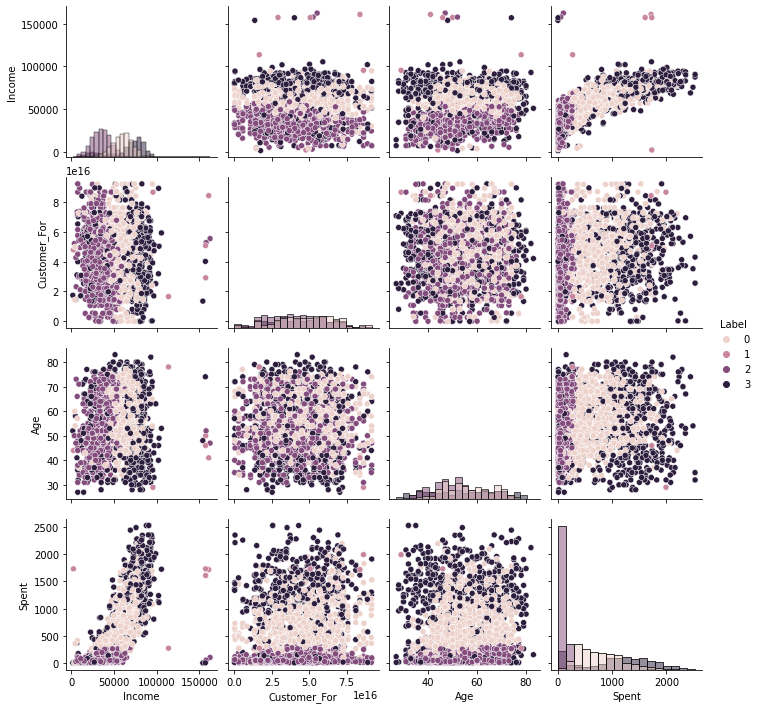

In [ ]:
sns.pairplot(c_persona[[ 'Income', 'Customer_For', 'Age', 'Spent',
         "Label"]],hue='Label', diag_kind='hist', kind='scatter');

Business Insights from pairplot:

- Income vs Age group: For label 2, most of the customers have low to mid income range and fall in low to mid age group. For label 0, most of the customers are from age group 35-75 with income ranging between 50000-100000. Label 1 consists of relative less customers mostly in age group 50-75 and income range of 45000-50000. Label 3 consists of customers from all age groups and income range of 80000-100000.

- Income vs Customer_for: Customers falling under all the labels are spread across the entire range of days(0-10) from which he is our customer.But label 2 customers who are from income range 45000-55000 are less. Also label 3 customers come under the higher income range.

- Age vs Customer_for: Most of the customers are falling under label 0 with age group of 50-70 are spread across the entire range of days(0-10) from which he is our customer. Whereas label 2 customers are relatively less and there are of age group 20-40. Also label 1 customers are widely spread over all the age group and are customers from 0-10 day.

- Income vs Spent: It can be seen that income and spent has the highest level of impact in forming the clusters as all the labels are not widely spread. A clear distinction of all the cluster can be made like cluster 1 customers are higher in number who have an income range 60000-80000 and spends 1500-2500 on a daily basis.

In [ ]:
c_persona[c_persona['target_int']==1]['Label'].value_counts()

2    779
0    615
3    417
1      5
Name: Label, dtype: int64

In [ ]:
c_persona[c_persona['target_int']==0]['Label'].value_counts()

3    65
0    14
Name: Label, dtype: int64

In [ ]:
c_persona[c_persona['target_int']==2]['Label'].value_counts()

3    146
0     93
2     77
1      1
Name: Label, dtype: int64

Marketing Insights:

- There are 64 customers in cluster 1 who are accepting both the campaigns and they belong to income range 60000-80000 while there spending range is 1500-2500 on a daily basis. This implies that they are the loyal customers for our business who will continue to purchase.

- In cluster 2 there are 640 customers who do not purchase anything even after looking at the promotion campaigns. These customers belong to income range 20000-40000 and soent 500-700 on daily basis. Therefore company needs to increase their promotion for this segment.

- For cluster 0 and cluster 3 customers are more likely to purchase once after getting influenced by one of the campaigns. As these customers are scattered between high and low income group and high and low spending. Company can work on the promotion of those products which comes under their budget so that it has a chance of converting that customer.